# DOCUMENT LEVEL SENTIMENT ANALYSIS

### NAIVE BAYES CLASSIFIER

In [1]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [2]:
movie_data = load_files(r"/home/swetha/Desktop/doc-level/txt_sentoken/")  
X, y = movie_data.data, movie_data.target  
print(X[0])
print(y[0])

b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [3]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
documents = []
for sen in range(0, len(X)):  
    document = re.sub(r'\W', ' ', str(X[sen]))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    document = document.lower()
    document = document.split()
    document = [word for word in document if not word in stop_words]
    document = [porter.stem(word) for word in document]
    document = [wordnet_lemmatizer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)
print(documents[0])

arnold schwarzenegg icon action enthusiast sinc late 80 late film sloppi one liner get wors nit hard see arnold mr freez batman robin especi say ton ice joke hey got 15 million matter nonc arnold sign anoth expens blockbust compar like termin seri true lie even era nin call dark thriller devil gabriel byrn come upon earth impregn woman robin tunney happen everi 1000 year basic destroy world appar god chosen one man one man jericho cane arnold nwith help trusti sidekick kevin pollack stop noth let devil take world npart actual absurd would fit right dogma nye film weak better blockbust right sleepi hollow make world enough look like 4 star film nanyway definit seem like arnold movi nit type film see nsure gave u chuckl well known one liner seem confus charact film go nit understand especi end chang accord sourc nasid form still walk much like past film ni sorri say arnold mayb end action day nspeak action film nthere hardli explos fight nthe devil made place explod arnold kick devil but

In [4]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=2235, min_df=2, max_df=0.7, stop_words=stopwords.words('english'),binary=False)
X = vectorizer.fit_transform(documents).toarray()  

In [5]:
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(X).toarray() 

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

In [7]:
bnb = BernoulliNB()
bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)

In [8]:
y_true, y_pred = y_test, y_pred
print(classification_report(y_true, y_pred))
print("Accuracy: " , accuracy_score(y_test, y_pred)) 
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred)) 

             precision    recall  f1-score   support

          0       0.77      0.87      0.82       102
          1       0.85      0.72      0.78        98

avg / total       0.81      0.80      0.80       200

Accuracy:  0.8
Confusion Matrix:
[[89 13]
 [27 71]]


In [9]:
DNB = accuracy_score(y_test, y_pred)*100
print(DNB)

80.0


### LOGISTIC REGRESSION

In [161]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [11]:
movie_data = load_files(r"/home/swetha/Desktop/doc-level/txt_sentoken/")  
X, y = movie_data.data, movie_data.target  
print(X[0])
print(y[0])

b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [12]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
documents = []
for sen in range(0, len(X)):  
    document = re.sub(r'\W', ' ', str(X[sen]))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    document = document.lower()
    document = document.split()
    document = [word for word in document if not word in stop_words]
    document = [porter.stem(word) for word in document]
    document = [wordnet_lemmatizer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)
print(documents[0])

arnold schwarzenegg icon action enthusiast sinc late 80 late film sloppi one liner get wors nit hard see arnold mr freez batman robin especi say ton ice joke hey got 15 million matter nonc arnold sign anoth expens blockbust compar like termin seri true lie even era nin call dark thriller devil gabriel byrn come upon earth impregn woman robin tunney happen everi 1000 year basic destroy world appar god chosen one man one man jericho cane arnold nwith help trusti sidekick kevin pollack stop noth let devil take world npart actual absurd would fit right dogma nye film weak better blockbust right sleepi hollow make world enough look like 4 star film nanyway definit seem like arnold movi nit type film see nsure gave u chuckl well known one liner seem confus charact film go nit understand especi end chang accord sourc nasid form still walk much like past film ni sorri say arnold mayb end action day nspeak action film nthere hardli explos fight nthe devil made place explod arnold kick devil but

In [13]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=2235, min_df=2, max_df=0.7, stop_words=stopwords.words('english'),binary=False)
X = vectorizer.fit_transform(documents).toarray()  

In [14]:
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(X).toarray() 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=10)
y_pred = grid.fit(X_train, y_train)

In [17]:
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)

Best cross-validation score: 0.84
Best parameters:  {'C': 1}
Best estimator:  LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [18]:
y_true, y_pred = y_test, grid.predict(X_test)
print(classification_report(y_true, y_pred))
print("Accuracy: ", accuracy_score(y_test, y_pred)) 
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))  

             precision    recall  f1-score   support

          0       0.85      0.83      0.84       102
          1       0.83      0.85      0.84        98

avg / total       0.84      0.84      0.84       200

Accuracy:  0.84
Confusion Matrix:
[[85 17]
 [15 83]]


In [19]:
DLR = (accuracy_score(y_test, y_pred)*100)
print(DLR)

84.0


### SUPPORT VECTOR MACHINE 

In [20]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [21]:
movie_data = load_files(r"/home/swetha/Desktop/doc-level/txt_sentoken/")  
X, y = movie_data.data, movie_data.target  
print(X[0])
print(y[0])

b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [22]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
documents = []
for sen in range(0, len(X)):  
    document = re.sub(r'\W', ' ', str(X[sen]))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    document = document.lower()
    document = document.split()
    document = [word for word in document if not word in stop_words]
    document = [porter.stem(word) for word in document]
    document = [wordnet_lemmatizer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)
print(documents[0])

arnold schwarzenegg icon action enthusiast sinc late 80 late film sloppi one liner get wors nit hard see arnold mr freez batman robin especi say ton ice joke hey got 15 million matter nonc arnold sign anoth expens blockbust compar like termin seri true lie even era nin call dark thriller devil gabriel byrn come upon earth impregn woman robin tunney happen everi 1000 year basic destroy world appar god chosen one man one man jericho cane arnold nwith help trusti sidekick kevin pollack stop noth let devil take world npart actual absurd would fit right dogma nye film weak better blockbust right sleepi hollow make world enough look like 4 star film nanyway definit seem like arnold movi nit type film see nsure gave u chuckl well known one liner seem confus charact film go nit understand especi end chang accord sourc nasid form still walk much like past film ni sorri say arnold mayb end action day nspeak action film nthere hardli explos fight nthe devil made place explod arnold kick devil but

In [23]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=2235, min_df=2, max_df=0.7, stop_words=stopwords.words('english'),binary=False)
X = vectorizer.fit_transform(documents).toarray()

In [24]:
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(X).toarray()

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

In [26]:
model1 = LinearSVC()   
model1.fit(X_train,y_train)
result1 = model1.predict(X_test)

In [27]:
y_true, y_pred = y_test, result1
print(classification_report(y_true, y_pred))
print("Accuracy:" , accuracy_score(y_test, y_pred)) 
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred)) 

             precision    recall  f1-score   support

          0       0.85      0.80      0.83       102
          1       0.81      0.86      0.83        98

avg / total       0.83      0.83      0.83       200

Accuracy: 0.83
Confusion Matrix:
[[82 20]
 [14 84]]


In [28]:
DSVM = accuracy_score(y_test, result1)*100
print(DSVM)

83.0


### RANDOM FOREST

In [29]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [30]:
movie_data = load_files(r"/home/swetha/Desktop/doc-level/txt_sentoken/")  
X, y = movie_data.data, movie_data.target  
print(X[0])
print(y[0])

b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [31]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
documents = []
for sen in range(0, len(X)):  
    document = re.sub(r'\W', ' ', str(X[sen]))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    document = document.lower()
    document = document.split()
    document = [word for word in document if not word in stop_words]
    document = [porter.stem(word) for word in document]
    document = [wordnet_lemmatizer.lemmatize(word) for word in document]
    document = ' '.join(document)
    documents.append(document)
print(documents[0])

arnold schwarzenegg icon action enthusiast sinc late 80 late film sloppi one liner get wors nit hard see arnold mr freez batman robin especi say ton ice joke hey got 15 million matter nonc arnold sign anoth expens blockbust compar like termin seri true lie even era nin call dark thriller devil gabriel byrn come upon earth impregn woman robin tunney happen everi 1000 year basic destroy world appar god chosen one man one man jericho cane arnold nwith help trusti sidekick kevin pollack stop noth let devil take world npart actual absurd would fit right dogma nye film weak better blockbust right sleepi hollow make world enough look like 4 star film nanyway definit seem like arnold movi nit type film see nsure gave u chuckl well known one liner seem confus charact film go nit understand especi end chang accord sourc nasid form still walk much like past film ni sorri say arnold mayb end action day nspeak action film nthere hardli explos fight nthe devil made place explod arnold kick devil but

In [32]:
from sklearn.feature_extraction.text import CountVectorizer  
vectorizer = CountVectorizer(max_features=2235, min_df=2, max_df=0.7, stop_words=stopwords.words('english'),binary=False)
X = vectorizer.fit_transform(documents)

In [33]:
tfidfconverter = TfidfTransformer()  
X = tfidfconverter.fit_transform(X)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

In [35]:
classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test) 

In [36]:
print(classification_report(y_test,y_pred))  
print("Accuracy:" , accuracy_score(y_test, y_pred))  
print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))  

             precision    recall  f1-score   support

          0       0.81      0.85      0.83       102
          1       0.84      0.79      0.81        98

avg / total       0.82      0.82      0.82       200

Accuracy: 0.82
Confusion Matrix:
[[87 15]
 [21 77]]


In [37]:
DRF = accuracy_score(y_test, y_pred)*100
print(DRF)

82.0


### INFORMATION GAIN CLASSIFIER

In [38]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [39]:
movie_data = load_files(r"/home/swetha/Desktop/doc-level/txt_sentoken/")  
X, y = movie_data.data, movie_data.target  
print(X[0])
print(y[0])

b"arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . \nit's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? \nonce again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . \nin this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . \nwith the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! \nparts of this are actually so absurd , that they would fit right in with dogma . \nyes , the film is 

In [40]:
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
documents = []
t1=[]
for sen in range(0, len(X)):  
    document = re.sub(r'\W', ' ', str(X[sen]))
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    document = re.sub(r'^b\s+', '', document)
    document = document.lower()
    document = document.split()
    document = [word for word in document if not word in stop_words]
    document = [porter.stem(word) for word in document]
    document = [wordnet_lemmatizer.lemmatize(word) for word in document]
    fdist1 = nltk.FreqDist(document)
    doc =fdist1.most_common(50)
    nt =[[row[i] for row in doc] for i in range(2)]
    t1 += nt[0]
print(t1[0])

film


In [41]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
x=len(t1)
t2=[]
for i in range(x):
    scores = sid.polarity_scores(t1[i])
    if scores['pos']>scores['neg']:
        t2.append(1)
    else:
        t2.append(0)

data = {'phrases': t1, 
        'sentiment': t2}
dff = pd.DataFrame(data)

def entropy(probs):
    import math
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

def entropy_of_list(a_list):
    from collections import Counter
    cnt = Counter(x for x in a_list)
    num_instances = len(a_list)*1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)

def information_gain(df, trace=0):
    split_attribute_name=df['phrase']; target_attribute_name=df['sentiment']
    df_split = df.groupby(split_attribute_name)
    nobs = len(df.index) * 1.0
    df_agg_ent = df_split.agg({target_attribute_name : [entropy_of_list, lambda x: len(x)/nobs] })[target_attribute_name]
    df_agg_ent.columns = ['Entropy', 'target']
    new_entropy = sum( df_agg_ent['Entropy'] * df_agg_ent['target'] )
    old_entropy = entropy_of_list(df[target_attribute_name])
    df['ig']= old_entropy-new_entropy
    df  =  df['ig']==0.5
    total = len(df['ig'])
    print(total)


information_gain(dff)

99953


In [42]:
del dff["ig"]
df = dff
print(len(df))

/home/swetha/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


99953


In [43]:
df

,phrases,sentiment
0,film,0
1,arnold,0
2,like,1
3,nit,0
4,see,0
5,devil,0
6,action,0
7,end,0
8,one,0
9,world,0


In [44]:
X = df['phrases']
y = df['sentiment']
msg_train,msg_test,label_train,label_test = train_test_split(X,y)

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
pipelineRFC = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,min_samples_leaf=160))
])

In [46]:
pipelineRFC.fit(msg_train,label_train)
preds = pipelineRFC.predict(msg_test)
print(classification_report(label_test,preds))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     23230
          1       1.00      0.42      0.60      1759

avg / total       0.96      0.96      0.95     24989



In [47]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(label_test,preds))
print("Accuracy:" , accuracy_score(label_test,preds))  
print("Confusion Matrix:")
print(confusion_matrix(label_test,preds))

             precision    recall  f1-score   support

          0       0.96      1.00      0.98     23230
          1       1.00      0.42      0.60      1759

avg / total       0.96      0.96      0.95     24989

Accuracy: 0.9594621633518748
Confusion Matrix:
[[23230     0]
 [ 1013   746]]


In [48]:
DIG = accuracy_score(label_test, preds)*100
print(DIG)

95.94621633518749


## PLOT-DOCUMENT-LEVEL SENTIMENT ANALYSIS

In [49]:
import matplotlib.pyplot as plt
Accuracy = [DIG, DLR, DNB, DRF, DSVM]
print(Accuracy)

[95.94621633518749, 84.0, 80.0, 82.0, 83.0]


In [50]:
Algorithm = ["IG", "LR", "NV", "RF", "SVM"]
print(Algorithm)

['IG', 'LR', 'NV', 'RF', 'SVM']


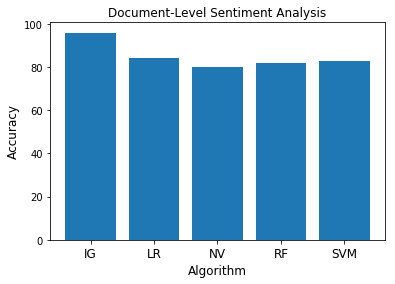

In [51]:
index = np.arange(len(Algorithm))
plt.bar(index, Accuracy)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(index, Algorithm, fontsize=12)
plt.title('Document-Level Sentiment Analysis')
plt.show()

# SENTENCE-LEVEL SENTIMENT ANALYSIS

### NAIVE BAYES CLASSIFIER

In [52]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [53]:
neg = open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.neg","r")
pos = open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.pos","r")
import codecs
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.pos", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr = s.split('\n')
import codecs
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.neg", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr += s.split('\n')
len(arr)

10664

In [54]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def text_process(mess):
    nocaps = [name for name in mess if name.islower()]
    nocaps = ' '.join(nocaps)
    nopunc = [char for char in nocaps if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords)
    stemmed = [porter.stem(word) for word in nostopwords]
    lem = [wordnet_lemmatizer.lemmatize(stem) for stem in stemmed]
    lem = ' '.join(lem)
    return lem

In [55]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [56]:
labels = np.zeros(10664);
labels[0:5331]=1;
labels[5332:10664]=0; 

In [57]:
kf = StratifiedKFold(n_splits=10)

In [58]:
for train_index, test_index in kf.split(arr,labels):
    X_train = [arr[i] for i in train_index]
    X_test = [arr[i] for i in test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [59]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipelineRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',BernoulliNB())
])

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

In [61]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pipelineRFC.fit(X_train,y_train)
preds = pipelineRFC.predict(X_test)
print(classification_report(y_test,preds))
print("Accuracy" , accuracy_score(y_test,preds))  
print("Confusion Matrix:")
print(confusion_matrix(y_test,preds))  

             precision    recall  f1-score   support

        0.0       0.55      0.42      0.48       533
        1.0       0.53      0.66      0.59       533

avg / total       0.54      0.54      0.53      1066

Accuracy 0.5412757973733584
Confusion Matrix:
[[223 310]
 [179 354]]


In [62]:
SNB = accuracy_score(y_test,preds)
print(SNB)

0.5412757973733584


### LOGISTIC REGRESSION

In [63]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [64]:
neg = open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.neg","r")
pos = open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.pos","r")
import codecs
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.pos", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr = s.split('\n')
import codecs
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.neg", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr += s.split('\n')
len(arr)

10664

In [65]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def text_process(mess):
    nocaps = [name for name in mess if name.islower()]
    nocaps = ' '.join(nocaps)
    nopunc = [char for char in nocaps if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords)
    stemmed = [porter.stem(word) for word in nostopwords]
    lem = [wordnet_lemmatizer.lemmatize(stem) for stem in stemmed]
    lem = ' '.join(lem)
    return lem

In [66]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_files
from sklearn.model_selection import GridSearchCV

In [67]:
labels = np.zeros(10664);
labels[0:5331]=1;
labels[5332:10664]=0; 

In [68]:
kf = StratifiedKFold(n_splits=10)

In [69]:
for train_index, test_index in kf.split(arr,labels):
    X_train = [arr[i] for i in train_index]
    X_test = [arr[i] for i in test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [70]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipelineRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
pipelineRFC.fit(X_train,y_train)
preds = pipelineRFC.predict(X_test)
print(classification_report(y_test,preds))
print("Accuracy:",accuracy_score(y_test,preds)) 
print("Confusion Matrix:")
print(confusion_matrix(y_test,preds))  

             precision    recall  f1-score   support

        0.0       0.56      0.58      0.57       533
        1.0       0.56      0.54      0.55       533

avg / total       0.56      0.56      0.56      1066

Accuracy: 0.5572232645403377
Confusion Matrix:
[[307 226]
 [246 287]]


In [72]:
SLR = accuracy_score(y_test,preds)
print(SLR)

0.5572232645403377


### SUPPORT VECTOR MACHINE

In [73]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [74]:
neg = open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.neg","r")
pos = open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.pos","r")
import codecs
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.pos", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr = s.split('\n')
import codecs
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.neg", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr += s.split('\n')
len(arr)

10664

In [75]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def text_process(mess):
    nocaps = [name for name in mess if name.islower()]
    nocaps = ' '.join(nocaps)
    nopunc = [char for char in nocaps if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords)
    stemmed = [porter.stem(word) for word in nostopwords]
    lem = [wordnet_lemmatizer.lemmatize(stem) for stem in stemmed]
    lem = ' '.join(lem)
    return lem

In [76]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB

In [77]:
labels = np.zeros(10664);
labels[0:5331]=1;
labels[5332:10664]=0; 

In [78]:
kf = StratifiedKFold(n_splits=10)

In [79]:
for train_index, test_index in kf.split(arr,labels):
    X_train = [arr[i] for i in train_index]
    X_test = [arr[i] for i in test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipelineRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LinearSVC())
])

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

In [82]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pipelineRFC.fit(X_train,y_train)
preds = pipelineRFC.predict(X_test)
print(classification_report(y_test,preds))
print("Accuracy",accuracy_score(y_test,preds))  
print("Confusion Matrix:")
print(confusion_matrix(y_test,preds))  

             precision    recall  f1-score   support

        0.0       0.56      0.58      0.57       533
        1.0       0.56      0.54      0.55       533

avg / total       0.56      0.56      0.56      1066

Accuracy 0.5600375234521576
Confusion Matrix:
[[307 226]
 [243 290]]


In [83]:
SSVM = accuracy_score(y_test,preds)
print(SSVM)

0.5600375234521576


### RANDOM FOREST

In [84]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [85]:
neg = open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.neg","r")
pos = open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.pos","r")
import codecs
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.pos", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr = s.split('\n')
import codecs
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.neg", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr += s.split('\n')
len(arr)

10664

In [86]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def text_process(mess):
    nocaps = [name for name in mess if name.islower()]
    nocaps = ' '.join(nocaps)
    nopunc = [char for char in nocaps if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords)
    stemmed = [porter.stem(word) for word in nostopwords]
    lem = [wordnet_lemmatizer.lemmatize(stem) for stem in stemmed]
    lem = ' '.join(lem)
    return lem

In [87]:
import os
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [88]:
labels = np.zeros(10664);
labels[0:5331]=1;
labels[5332:10664]=0; 

In [89]:
kf = StratifiedKFold(n_splits=10)

In [90]:
for train_index, test_index in kf.split(arr,labels):
    X_train = [arr[i] for i in train_index]
    X_test = [arr[i] for i in test_index]
    y_train, y_test = labels[train_index], labels[test_index]

In [91]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
pipelineRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

In [93]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pipelineRFC.fit(X_train,y_train)
preds = pipelineRFC.predict(X_test)
print(classification_report(y_test,preds))
print(accuracy_score(y_test,preds))  
print("Confusion Matrix:")
print(confusion_matrix(y_test,preds))  

             precision    recall  f1-score   support

        0.0       0.53      0.62      0.57       533
        1.0       0.54      0.44      0.49       533

avg / total       0.53      0.53      0.53      1066

0.5300187617260788
Confusion Matrix:
[[328 205]
 [296 237]]


In [94]:
SRF = accuracy_score(y_test,preds)
print(SRF)

0.5300187617260788


### INFORMATION GAIN CLASSIFIER

In [95]:
import numpy as np  
import re  
import nltk  
from sklearn.datasets import load_files  
import pickle  
from nltk.corpus import stopwords  
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier

In [96]:
import codecs
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.pos", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr = s.split('\n')
with codecs.open("/home/swetha/sen-level/rt-polaritydata/rt-polarity.neg", "r",encoding='utf-8', errors='ignore') as fdata:
  s= fdata.read()
arr += s.split('\n')
len(arr)

10664

In [97]:
from nltk.corpus import stopwords 
import numpy as np
import pandas as pd
import string
stop_words = set(stopwords.words('english'))
porter = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
sentwords=[]
for i in arr:
    j=str(i)
    j = j.split(' ')
    j = [word for word in j if not word in stop_words]
    j = [porter.stem(word) for word in j]
    j = [wordnet_lemmatizer.lemmatize(word) for word in j]
    j = [word for word in j if word not in string.punctuation]
    sentwords += [word for word in j]
print(len(sentwords))

113209


In [98]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
x=len(sentwords)
t2=[]
for i in range(x):
    scores = sid.polarity_scores(sentwords[i])
    if scores['pos']>scores['neg']:
        t2.append(1)
    else:
        t2.append(0)
print(len(t2))

import numpy as np
import pandas as pd
data = {'phrases': sentwords, 
        'sentiment': t2}
dff = pd.DataFrame(data)

def entropy(probs):
    import math
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

def entropy_of_list(a_list):
    from collections import Counter
    cnt = Counter(x for x in a_list)
    num_instances = len(a_list)*1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)

def information_gain(df, trace=0):
    split_attribute_name=df['phrases']; target_attribute_name=df['sentiment']
    df_split = df.groupby(split_attribute_name)
    nobs = len(df.index) * 1.0
    df_agg_ent = df_split.agg({target_attribute_name : [entropy_of_list, lambda x: len(x)/nobs] })[target_attribute_name]
    df_agg_ent.columns = ['Entropy', 'target']
    new_entropy = sum( df_agg_ent['Entropy'] * df_agg_ent['target'] )
    old_entropy = entropy_of_list(df[target_attribute_name])
    dff['ig']= old_entropy-new_entropy
    dff  =  dff['ig']==0.5
    total = len(dff['ig'])
    print(total)

information_gain(dff)

113209


In [99]:
del dff["ig"]
df = dff
print(len(df))
df

,phrases,sentiment
0,rock,0
1,destin,0
2,21st,0
3,century',0
4,new,0
5,conan,0
6,he',0
7,go,0
8,make,0
9,splash,0


In [100]:
X = df['phrases']
y = df['sentiment']
msg_train,msg_test,label_train,label_test = train_test_split(X,y)

In [101]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
pipelineRFC = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier(criterion='entropy',random_state=0,max_depth=100,min_samples_leaf=35))
])

In [102]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pipelineRFC.fit(msg_train,label_train)
preds = pipelineRFC.predict(msg_test)
print(classification_report(label_test,preds))
print("Accuracy" , accuracy_score(label_test,preds))  
print("Confusion Matrix:")
print(confusion_matrix(label_test,preds))  

             precision    recall  f1-score   support

          0       0.97      1.00      0.99     26053
          1       1.00      0.67      0.80      2250

avg / total       0.97      0.97      0.97     28303

Accuracy 0.9738190297848285
Confusion Matrix:
[[26046     7]
 [  734  1516]]


In [104]:
SIG = accuracy_score(label_test,preds)
print(SIG)

0.9738190297848285


## PLOT- SENTENCE-LEVEL SENTIMENT ANALYSIS

In [105]:
import matplotlib.pyplot as plt
Accuracy = [SIG*100, SLR*100, SNB*100, SRF*100, SSVM*100]
print(Accuracy)

[97.38190297848284, 55.72232645403376, 54.12757973733584, 53.00187617260788, 56.003752345215766]


In [106]:
Algorithm = ["IG", "LR", "NV", "RF", "SVM"]
print(Algorithm)

['IG', 'LR', 'NV', 'RF', 'SVM']


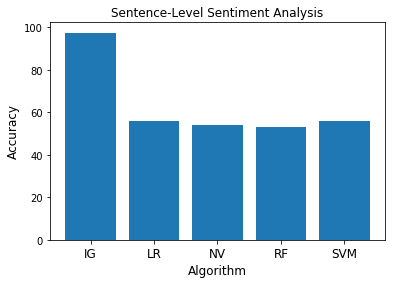

In [107]:
index = np.arange(len(Algorithm))
plt.bar(index, Accuracy)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(index, Algorithm, fontsize=12)
plt.title('Sentence-Level Sentiment Analysis')
plt.show()

# FEATURE-LEVEL SENTIMENT ANALYSIS

### NAIVE BAYES CLASSIFIER

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

In [109]:
trainmessages = pd.read_csv('/home/swetha/feature-level/ftrain.tsv', sep='\t')

In [110]:
trainmessages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76478 entries, 0 to 76477
Data columns (total 4 columns):
PhraseId      76478 non-null int64
SentenceId    76478 non-null int64
Phrase        76477 non-null object
Sentiment     76478 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


In [111]:
trainmessages['Phrase'].describe()
trainmessages.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,0
1,22,1,good for the goose,0
2,23,1,good,0
3,34,1,"the gander , some of which occasionally amuses...",0
4,47,1,amuses,0


In [112]:
testmessages = pd.read_csv('/home/swetha/feature-level/ftest.tsv', sep='\t')
testmessages.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


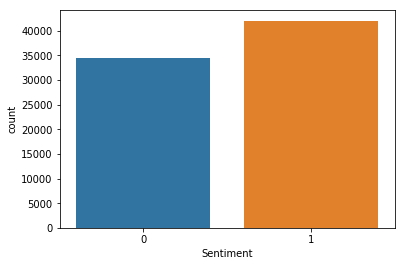

In [113]:
sns.countplot(data=trainmessages,x='Sentiment')

In [114]:
trainmessages.isnull().sum()
trainmessages.isna().sum()

PhraseId      0
SentenceId    0
Phrase        1
Sentiment     0
dtype: int64

In [115]:
trainmessages['Length'] = trainmessages['Phrase'].apply(lambda x: len(str(x).split(' ')))
trainmessages['Length'].unique()

array([37,  4,  1, 18, 10,  9, 11,  7,  6,  5,  3,  2, 21, 14,  8, 26, 25,
       16, 19, 13, 12, 20, 17, 22, 30, 27, 24, 41, 40, 15, 36, 28, 23, 29,
       31, 32, 33, 42, 39, 38, 34, 35, 43, 45, 44, 49, 48, 47, 46, 51, 50,
       52])

In [116]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() >0]

In [117]:
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [118]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() != 0]
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [119]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def text_process(mess):
    nocaps = [name for name in mess if name.islower()]
    nocaps = ' '.join(nocaps)
    nopunc = [char for char in nocaps if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords)
    stemmed = [porter.stem(word) for word in nostopwords]
    lem = [wordnet_lemmatizer.lemmatize(stem) for stem in stemmed]
    lem = ' '.join(lem)
    return lem

In [120]:
sent_0 = trainmessages[trainmessages['Sentiment']==0]
sent_1 = trainmessages[trainmessages['Sentiment']==1]
trainmessages = trainmessages.append([sent_0,sent_0])
trainmessages = trainmessages.append([sent_1,sent_1])

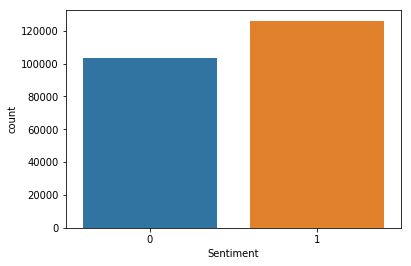

In [121]:
sns.countplot(data=trainmessages,x='Sentiment')

In [122]:
X = trainmessages['Phrase']
y = trainmessages['Sentiment']
msg_train,msg_test,label_train,label_test = train_test_split(X,y)

In [123]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
pipelineRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',BernoulliNB())
])

In [124]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pipelineRFC.fit(msg_train,label_train)
preds = pipelineRFC.predict(msg_test)
print(classification_report(label_test,preds))
print("Accuracy" ,accuracy_score(label_test,preds))  
print("Confusion Matrix:")
print(confusion_matrix(label_test,preds))

             precision    recall  f1-score   support

          0       0.51      0.24      0.33     25817
          1       0.57      0.81      0.66     31541

avg / total       0.54      0.55      0.51     57358

Accuracy 0.5529830189337146
Confusion Matrix:
[[ 6290 19527]
 [ 6113 25428]]


In [125]:
FNB = accuracy_score(label_test,preds)*100
print(FNB)

55.29830189337146


### LOGISTIC REGRESSON

In [126]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

In [127]:
trainmessages = pd.read_csv('/home/swetha/feature-level/ftrain.tsv', sep='\t')

In [128]:
trainmessages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76478 entries, 0 to 76477
Data columns (total 4 columns):
PhraseId      76478 non-null int64
SentenceId    76478 non-null int64
Phrase        76477 non-null object
Sentiment     76478 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


In [129]:
trainmessages['Phrase'].describe()
trainmessages.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,0
1,22,1,good for the goose,0
2,23,1,good,0
3,34,1,"the gander , some of which occasionally amuses...",0
4,47,1,amuses,0


In [130]:
testmessages = pd.read_csv('/home/swetha/feature-level/ftest.tsv', sep='\t')
testmessages.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


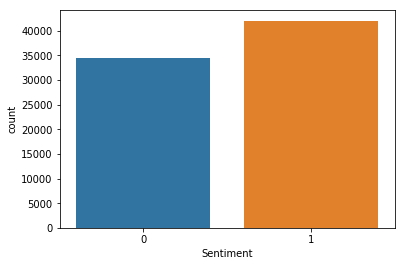

In [131]:
sns.countplot(data=trainmessages,x='Sentiment')

In [132]:
trainmessages.isnull().sum()
trainmessages.isna().sum()

PhraseId      0
SentenceId    0
Phrase        1
Sentiment     0
dtype: int64

In [133]:
trainmessages['Length'] = trainmessages['Phrase'].apply(lambda x: len(str(x).split(' ')))
trainmessages['Length'].unique()

array([37,  4,  1, 18, 10,  9, 11,  7,  6,  5,  3,  2, 21, 14,  8, 26, 25,
       16, 19, 13, 12, 20, 17, 22, 30, 27, 24, 41, 40, 15, 36, 28, 23, 29,
       31, 32, 33, 42, 39, 38, 34, 35, 43, 45, 44, 49, 48, 47, 46, 51, 50,
       52])

In [134]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() >0]

In [135]:
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [136]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() != 0]
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [137]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def text_process(mess):
    nocaps = [name for name in mess if name.islower()]
    nocaps = ' '.join(nocaps)
    nopunc = [char for char in nocaps if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords)
    stemmed = [porter.stem(word) for word in nostopwords]
    lem = [wordnet_lemmatizer.lemmatize(stem) for stem in stemmed]
    lem = ' '.join(lem)
    return lem

In [138]:
sent_0 = trainmessages[trainmessages['Sentiment']==0]
sent_1 = trainmessages[trainmessages['Sentiment']==1]
trainmessages = trainmessages.append([sent_0,sent_0])
trainmessages = trainmessages.append([sent_1,sent_1])

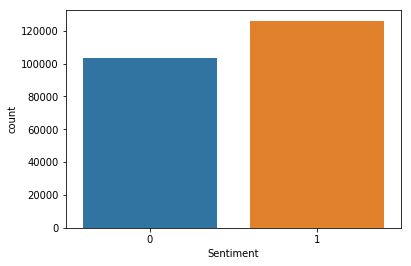

In [139]:
sns.countplot(data=trainmessages,x='Sentiment')

In [140]:
X = trainmessages['Phrase']
y = trainmessages['Sentiment']
msg_train,msg_test,label_train,label_test = train_test_split(X,y)

In [141]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
pipelineRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [142]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 
pipelineRFC.fit(msg_train,label_train)
preds = pipelineRFC.predict(msg_test)
print(classification_report(label_test,preds))
print("Accuracy:", accuracy_score(label_test,preds)) 
print("Confusion Matrix:")
print(confusion_matrix(label_test,preds))

             precision    recall  f1-score   support

          0       0.54      0.14      0.22     25946
          1       0.56      0.90      0.69     31412

avg / total       0.55      0.56      0.48     57358

Accuracy: 0.5567139718958123
Confusion Matrix:
[[ 3574 22372]
 [ 3054 28358]]


In [143]:
FLR = accuracy_score(label_test,preds)*100
print(FLR)

55.67139718958123


### SUPPORT VECTOR MACHINE

In [144]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

In [145]:
trainmessages = pd.read_csv('/home/swetha/feature-level/ftrain.tsv', sep='\t')

In [146]:
trainmessages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76478 entries, 0 to 76477
Data columns (total 4 columns):
PhraseId      76478 non-null int64
SentenceId    76478 non-null int64
Phrase        76477 non-null object
Sentiment     76478 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


In [147]:
trainmessages['Phrase'].describe()
trainmessages.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,0
1,22,1,good for the goose,0
2,23,1,good,0
3,34,1,"the gander , some of which occasionally amuses...",0
4,47,1,amuses,0


In [148]:
testmessages = pd.read_csv('/home/swetha/feature-level/ftest.tsv', sep='\t')
testmessages.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


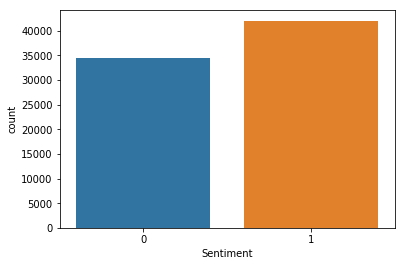

In [149]:
sns.countplot(data=trainmessages,x='Sentiment')

In [150]:
trainmessages.isnull().sum()
trainmessages.isna().sum()

PhraseId      0
SentenceId    0
Phrase        1
Sentiment     0
dtype: int64

In [151]:
trainmessages['Length'] = trainmessages['Phrase'].apply(lambda x: len(str(x).split(' ')))
trainmessages['Length'].unique()

array([37,  4,  1, 18, 10,  9, 11,  7,  6,  5,  3,  2, 21, 14,  8, 26, 25,
       16, 19, 13, 12, 20, 17, 22, 30, 27, 24, 41, 40, 15, 36, 28, 23, 29,
       31, 32, 33, 42, 39, 38, 34, 35, 43, 45, 44, 49, 48, 47, 46, 51, 50,
       52])

In [152]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() >0]

In [153]:
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [154]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() != 0]
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [155]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def text_process(mess):
    nocaps = [name for name in mess if name.islower()]
    nocaps = ' '.join(nocaps)
    nopunc = [char for char in nocaps if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords)
    stemmed = [porter.stem(word) for word in nostopwords]
    lem = [wordnet_lemmatizer.lemmatize(stem) for stem in stemmed]
    lem = ' '.join(lem)
    return lem

In [156]:
sent_0 = trainmessages[trainmessages['Sentiment']==0]
sent_1 = trainmessages[trainmessages['Sentiment']==1]
trainmessages = trainmessages.append([sent_0,sent_0])
trainmessages = trainmessages.append([sent_1,sent_1])

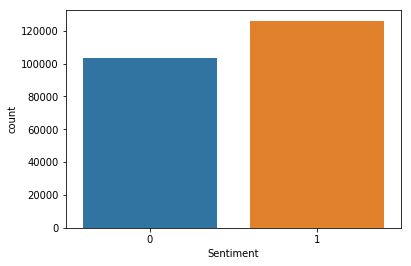

In [157]:
sns.countplot(data=trainmessages,x='Sentiment')

In [158]:
X = trainmessages['Phrase']
y = trainmessages['Sentiment']
msg_train,msg_test,label_train,label_test = train_test_split(X,y)

In [159]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
pipelineRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',LinearSVC())
])

In [160]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pipelineRFC.fit(msg_train,label_train)
preds = pipelineRFC.predict(msg_test)
print(classification_report(label_test,preds))
print("Accuracy:",accuracy_score(label_test,preds))  
print("Confusion Matrix:")
print(confusion_matrix(label_test,preds))  

             precision    recall  f1-score   support

          0       0.54      0.13      0.21     25800
          1       0.56      0.91      0.69     31558

avg / total       0.55      0.56      0.48     57358

Accuracy: 0.5593988632797517
Confusion Matrix:
[[ 3402 22398]
 [ 2874 28684]]


In [162]:
FSVM = accuracy_score(label_test,preds)*100
print(FSVM)

55.939886327975174


### RANDOM FOREST

In [163]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

In [164]:
trainmessages = pd.read_csv('/home/swetha/feature-level/ftrain.tsv', sep='\t')

In [165]:
trainmessages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76478 entries, 0 to 76477
Data columns (total 4 columns):
PhraseId      76478 non-null int64
SentenceId    76478 non-null int64
Phrase        76477 non-null object
Sentiment     76478 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


In [166]:
trainmessages['Phrase'].describe()
trainmessages.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,0
1,22,1,good for the goose,0
2,23,1,good,0
3,34,1,"the gander , some of which occasionally amuses...",0
4,47,1,amuses,0


In [167]:
testmessages = pd.read_csv('/home/swetha/feature-level/ftest.tsv', sep='\t')
testmessages.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


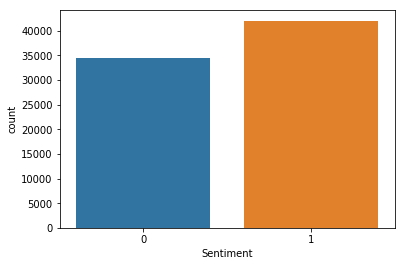

In [168]:
sns.countplot(data=trainmessages,x='Sentiment')

In [169]:
trainmessages.isnull().sum()
trainmessages.isna().sum()

PhraseId      0
SentenceId    0
Phrase        1
Sentiment     0
dtype: int64

In [170]:
trainmessages['Length'] = trainmessages['Phrase'].apply(lambda x: len(str(x).split(' ')))
trainmessages['Length'].unique()

array([37,  4,  1, 18, 10,  9, 11,  7,  6,  5,  3,  2, 21, 14,  8, 26, 25,
       16, 19, 13, 12, 20, 17, 22, 30, 27, 24, 41, 40, 15, 36, 28, 23, 29,
       31, 32, 33, 42, 39, 38, 34, 35, 43, 45, 44, 49, 48, 47, 46, 51, 50,
       52])

In [171]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() >0]

In [172]:
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [173]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() != 0]
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [174]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def text_process(mess):
    nocaps = [name for name in mess if name.islower()]
    nocaps = ' '.join(nocaps)
    nopunc = [char for char in nocaps if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords)
    stemmed = [porter.stem(word) for word in nostopwords]
    lem = [wordnet_lemmatizer.lemmatize(stem) for stem in stemmed]
    lem = ' '.join(lem)
    return lem

In [175]:
sent_0 = trainmessages[trainmessages['Sentiment']==0]
sent_1 = trainmessages[trainmessages['Sentiment']==1]
trainmessages = trainmessages.append([sent_0,sent_0])
trainmessages = trainmessages.append([sent_1,sent_1])

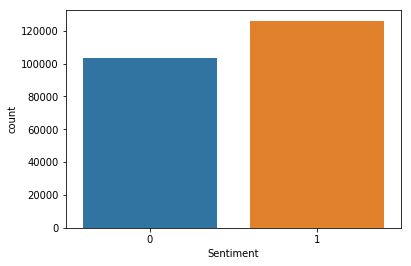

In [176]:
sns.countplot(data=trainmessages,x='Sentiment')

In [177]:
X = trainmessages['Phrase']
y = trainmessages['Sentiment']
msg_train,msg_test,label_train,label_test = train_test_split(X,y)

In [178]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
pipelineRFC = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

In [179]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pipelineRFC.fit(msg_train,label_train)
preds = pipelineRFC.predict(msg_test)
print(classification_report(label_test,preds))
print("Accuracy",accuracy_score(label_test,preds))  
print("Confusion Matrix:")
print(confusion_matrix(label_test,preds))

             precision    recall  f1-score   support

          0       0.93      0.94      0.93     25829
          1       0.95      0.94      0.95     31529

avg / total       0.94      0.94      0.94     57358

Accuracy 0.9403047526064368
Confusion Matrix:
[[24233  1596]
 [ 1828 29701]]


In [180]:
FRF = accuracy_score(label_test,preds)*100
print(FRF)

94.03047526064367


### INFORMATION-GAIN CLASSIFIER

In [181]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
import string
import nltk
from nltk.corpus import stopwords
from sklearn.metrics import classification_report

In [182]:
trainmessages = pd.read_csv('/home/swetha/feature-level/ftrain.tsv', sep='\t')

In [183]:
trainmessages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76478 entries, 0 to 76477
Data columns (total 4 columns):
PhraseId      76478 non-null int64
SentenceId    76478 non-null int64
Phrase        76477 non-null object
Sentiment     76478 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


In [184]:
trainmessages['Phrase'].describe()
trainmessages.head()

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,0
1,22,1,good for the goose,0
2,23,1,good,0
3,34,1,"the gander , some of which occasionally amuses...",0
4,47,1,amuses,0


In [185]:
testmessages = pd.read_csv('/home/swetha/feature-level/ftest.tsv', sep='\t')
testmessages.head()

,PhraseId,SentenceId,Phrase
0,156061,8545,An intermittently pleasing but mostly routine ...
1,156062,8545,An intermittently pleasing but mostly routine ...
2,156063,8545,An
3,156064,8545,intermittently pleasing but mostly routine effort
4,156065,8545,intermittently pleasing but mostly routine


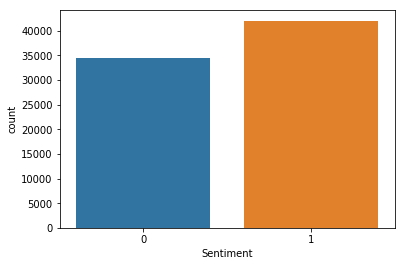

In [186]:
sns.countplot(data=trainmessages,x='Sentiment')

In [187]:
trainmessages.isnull().sum()
trainmessages.isna().sum()

PhraseId      0
SentenceId    0
Phrase        1
Sentiment     0
dtype: int64

In [188]:
trainmessages['Length'] = trainmessages['Phrase'].apply(lambda x: len(str(x).split(' ')))
trainmessages['Length'].unique()

array([37,  4,  1, 18, 10,  9, 11,  7,  6,  5,  3,  2, 21, 14,  8, 26, 25,
       16, 19, 13, 12, 20, 17, 22, 30, 27, 24, 41, 40, 15, 36, 28, 23, 29,
       31, 32, 33, 42, 39, 38, 34, 35, 43, 45, 44, 49, 48, 47, 46, 51, 50,
       52])

In [189]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() >0]

In [190]:
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [191]:
trainmessages = trainmessages[trainmessages['Phrase'].str.len() != 0]
trainmessages[trainmessages['Phrase'].str.len() == 0].head()

,PhraseId,SentenceId,Phrase,Sentiment,Length


In [192]:
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def text_process(mess):
    nocaps = [name for name in mess if name.islower()]
    nocaps = ' '.join(nocaps)
    nopunc = [char for char in nocaps if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    nostopwords = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    nostopwords = ' '.join(nostopwords)
    stemmed = [porter.stem(word) for word in nostopwords]
    lem = [wordnet_lemmatizer.lemmatize(stem) for stem in stemmed]
    lem = ' '.join(lem)
    return lem

In [193]:
sent_0 = trainmessages[trainmessages['Sentiment']==0]
sent_1 = trainmessages[trainmessages['Sentiment']==1]
trainmessages = trainmessages.append([sent_0,sent_0])
trainmessages = trainmessages.append([sent_1,sent_1])

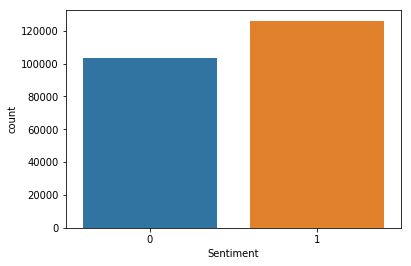

In [194]:
sns.countplot(data=trainmessages,x='Sentiment')

In [195]:
def entropy(probs):
    import math
    return sum( [-prob*math.log(prob, 2) for prob in probs] )

def entropy_of_list(a_list):
    from collections import Counter
    cnt = Counter(x for x in a_list)
    num_instances = len(a_list)*1.0
    probs = [x / num_instances for x in cnt.values()]
    return entropy(probs)

def information_gain(df, trace=0):
    split_attribute_name=df['Phrase']; target_attribute_name=df['Sentiment']
    df_split = df.groupby(split_attribute_name)
    nobs = len(df.index) * 1.0
    df_agg_ent = df_split.agg({target_attribute_name : [entropy_of_list, lambda x: len(x)/nobs] })[target_attribute_name]
    df_agg_ent.columns = ['Entropy', 'target']
    new_entropy = sum( df_agg_ent['Entropy'] * df_agg_ent['target'] )
    old_entropy = entropy_of_list(df[target_attribute_name])
    dff['ig']= old_entropy-new_entropy
    dff  =  dff['ig']==0.5
    total = len(dff['ig'])

information_gain(trainmessages)
del trainmessages["ig"]

X = trainmessages['Phrase']
y = trainmessages['Sentiment']
msg_train,msg_test,label_train,label_test = train_test_split(X,y)

In [196]:
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
pipelineRFC = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',DecisionTreeClassifier(criterion='entropy'))
])

In [197]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pipelineRFC.fit(msg_train,label_train)
preds = pipelineRFC.predict(msg_test)
print(classification_report(label_test,preds))
print("Accuracy:",accuracy_score(label_test,preds))  
print("Confusion Matrix:")
print(confusion_matrix(label_test,preds))

             precision    recall  f1-score   support

          0       0.99      0.98      0.98     25952
          1       0.98      0.99      0.99     31406

avg / total       0.99      0.99      0.99     57358

Accuracy: 0.9850238850727013
Confusion Matrix:
[[25452   500]
 [  359 31047]]


In [198]:
FIG = accuracy_score(label_test,preds)*100
print(FIG)

98.50238850727013


## PLOT- FEATURE LEVEL SENTIMENT ANALYSIS

In [199]:
import matplotlib.pyplot as plt
Accuracy = [FIG, FLR, FNB, FRF, FSVM]
print(Accuracy)

[98.50238850727013, 55.67139718958123, 55.29830189337146, 94.03047526064367, 55.939886327975174]


In [200]:
Algorithm = ["IG", "LR", "NV", "RF", "SVM"]
print(Algorithm)

['IG', 'LR', 'NV', 'RF', 'SVM']


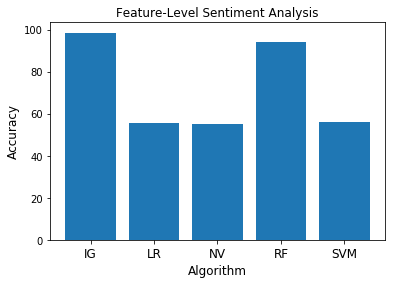

In [201]:
index = np.arange(len(Algorithm))
plt.bar(index, Accuracy)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(index, Algorithm, fontsize=12)
plt.title('Feature-Level Sentiment Analysis')
plt.show()